In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\user\Downloads\weatherAUS.csv")

### Firstly I get some general information about the data, like its number of rows, columns, column names, data type etc.

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.drop(columns=["RISK_MM"],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### I encode RainToday and RainTomorrow columns, cause they have "Yes" and "No" values. But for modeling, we should only have numerical data and we can directly encode these columns values from yes to 1, and from no to 0

In [9]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


### Here we can see that RainToday and RainTomorrow columns' types have changed as we encoded them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Visualizations

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### This visualization shows the distribution of all numerical columns in data. Here we can see that most of the variables are nearly normally distributed

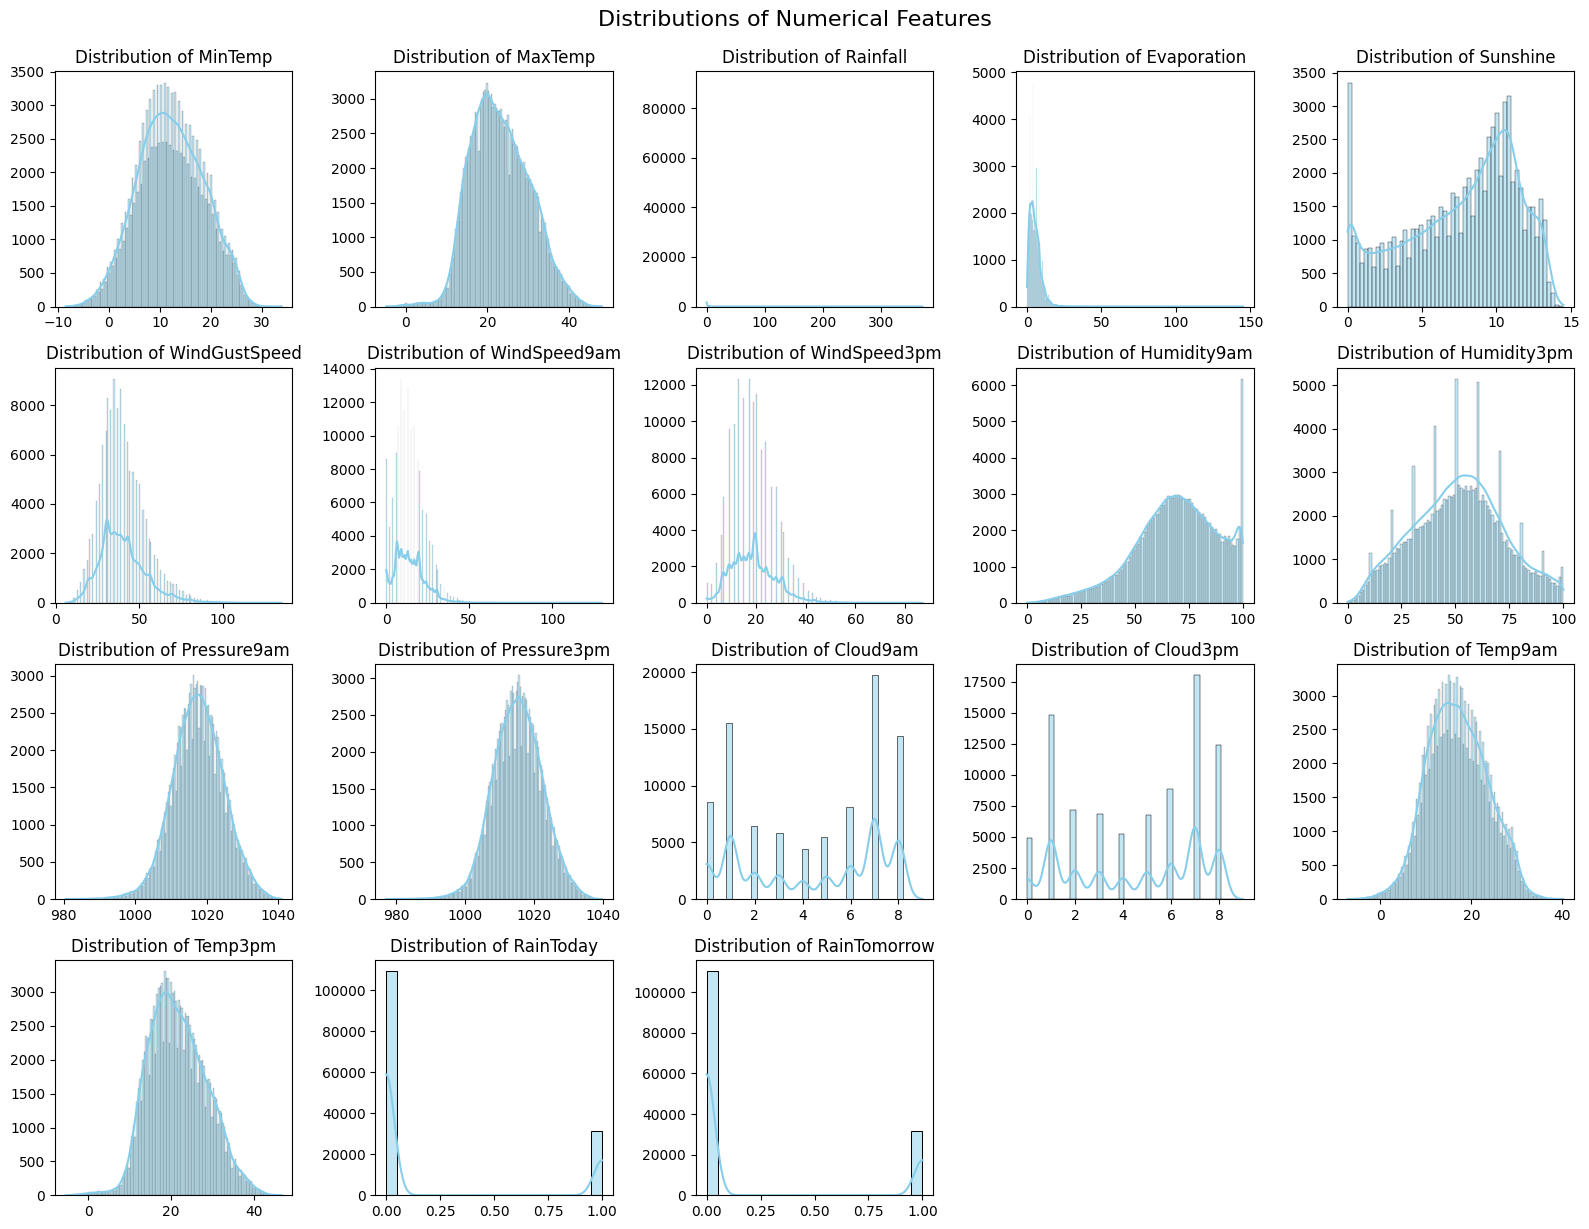

In [14]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)  
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()


### Here we can see that when it rains, the average temperature is lower than when it doesn't rain (it's pretty normal of course)

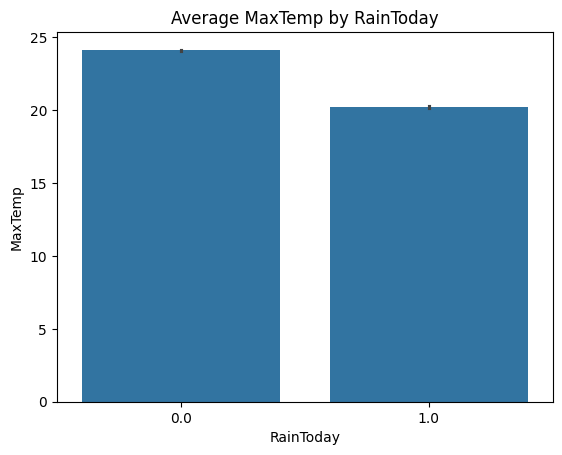

In [15]:
sns.barplot(x='RainToday', y='MaxTemp', data=df)
plt.title('Average MaxTemp by RainToday')
plt.show()


### Here we can infer that for rainy days, the wind is more speedy

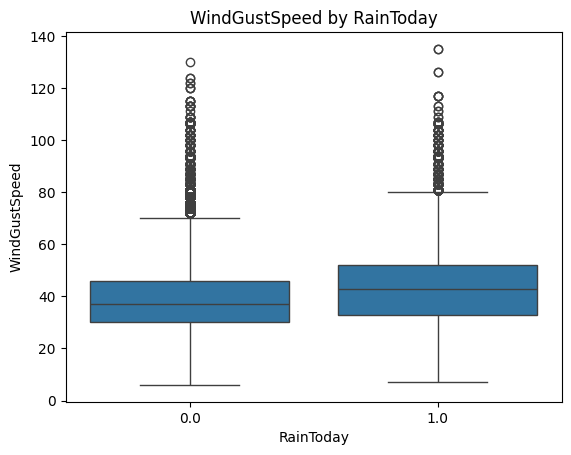

In [16]:
sns.boxplot(x='RainToday', y='WindGustSpeed', data=df)
plt.title('WindGustSpeed by RainToday')
plt.show()


### It shows number of rainy and not rainy days for each wind direction for 9am

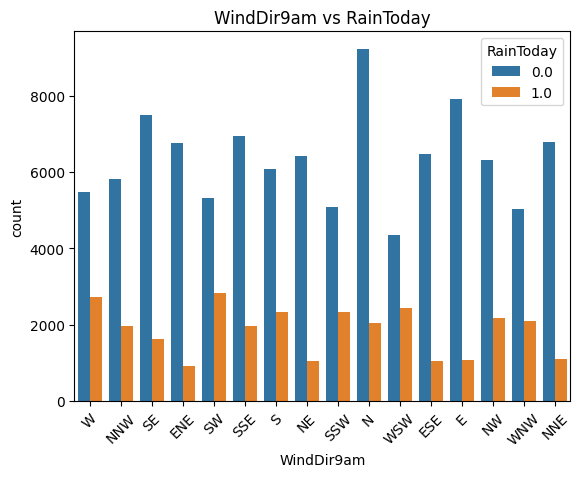

In [17]:
sns.countplot(x='WindDir9am', hue='RainToday', data=df)
plt.title('WindDir9am vs RainToday')
plt.xticks(rotation=45)
plt.show()


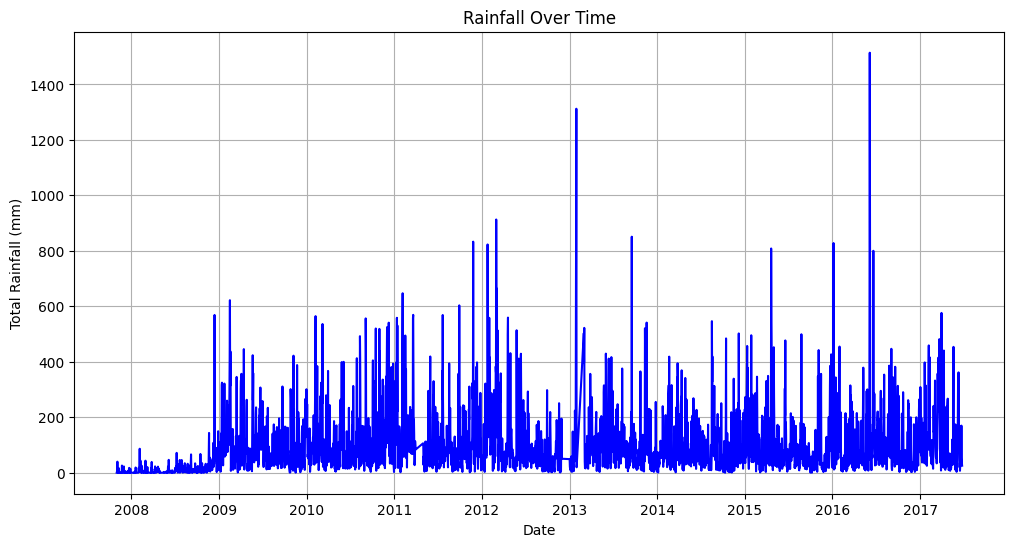

In [19]:
# Group the data by Date and sum or average the Rainfall
rainfall_by_date = df.groupby('Date')['Rainfall'].sum()

plt.figure(figsize=(12, 6))
plt.plot(rainfall_by_date.index, rainfall_by_date.values, color='blue', linewidth=1.5)
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()

### Here we can see the locations and average rainfall for them

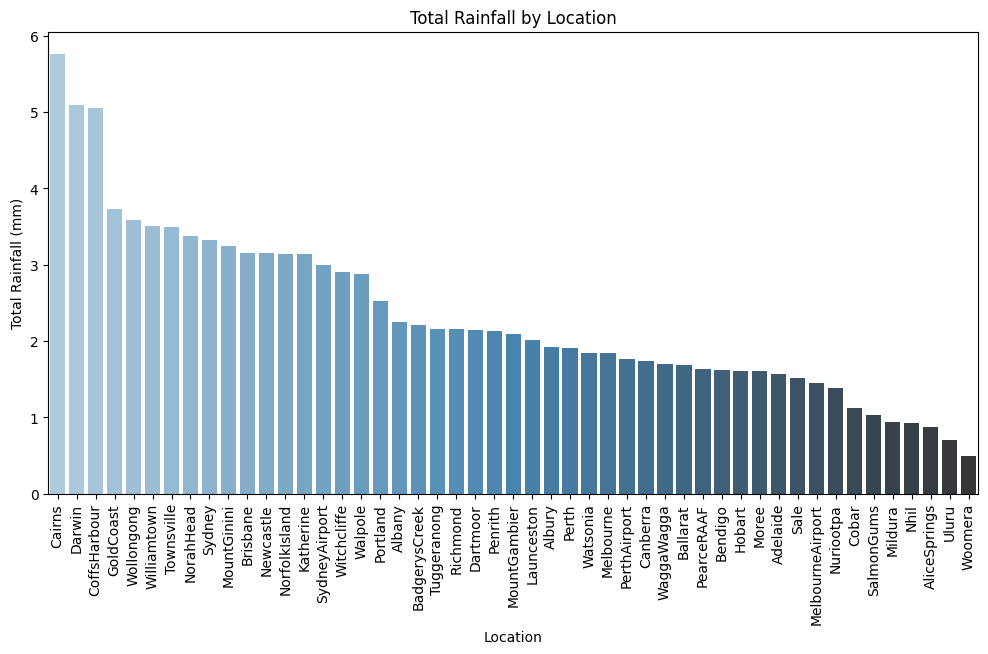

In [20]:
rainfall_by_location = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=rainfall_by_location.index, y=rainfall_by_location.values, palette='Blues_d')
plt.title('Total Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=90)  
plt.show()


### Here we can infer that for rainy days the number of hours of sunshine were less than not rainy days

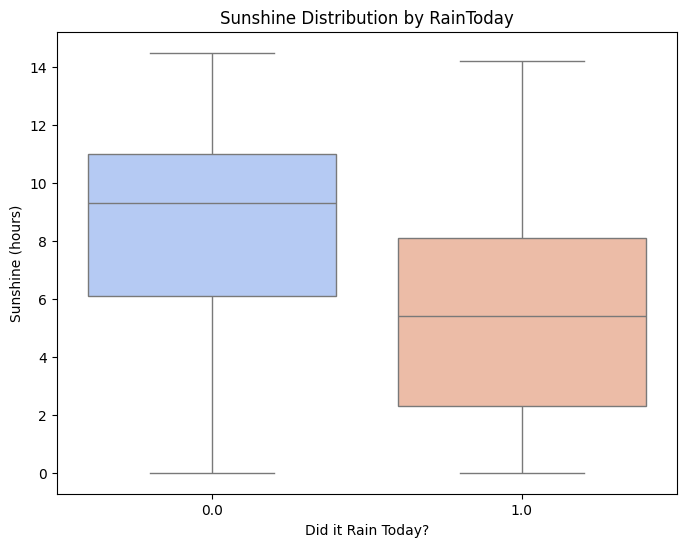

In [21]:
filtered_df = df[['RainToday', 'Sunshine']].dropna()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainToday', y='Sunshine', data=filtered_df, palette='coolwarm')
plt.title('Sunshine Distribution by RainToday')
plt.xlabel('Did it Rain Today?')
plt.ylabel('Sunshine (hours)')
plt.show()


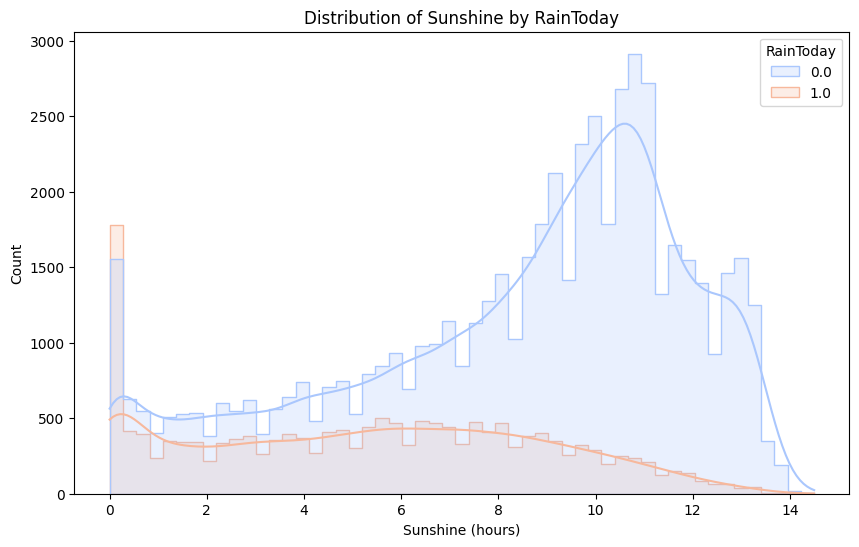

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Sunshine', hue='RainToday', element='step', kde=True, palette='coolwarm')
plt.title('Distribution of Sunshine by RainToday')
plt.xlabel('Sunshine (hours)')
plt.ylabel('Count')
plt.show()


### Here we can see that, for morning humidity is high, but it lessens as the hours past and it mostly becomes medium for afternoon hours

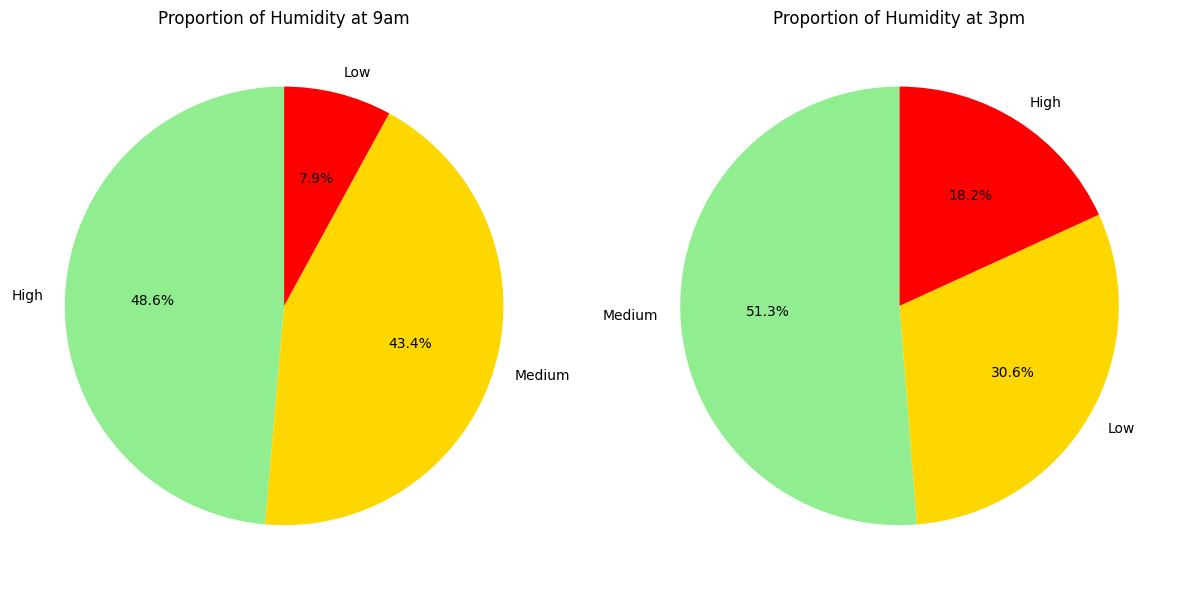

In [23]:
# Bin Humidity9am into Low (0-40), Medium (41-70), High (71-100)
df['Humidity9am_Binned'] = pd.cut(df['Humidity9am'], bins=[-1, 40, 70, 100], labels=['Low', 'Medium', 'High'])
humidity9am_counts = df['Humidity9am_Binned'].value_counts()

# Bin Humidity3pm into Low (0-40), Medium (41-70), High (71-100)
df['Humidity3pm_Binned'] = pd.cut(df['Humidity3pm'], bins=[-1, 40, 70, 100], labels=['Low', 'Medium', 'High'])
humidity3pm_counts = df['Humidity3pm_Binned'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

# Pie chart for Humidity at 9am
axes[0].pie(humidity9am_counts, labels=humidity9am_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['lightgreen', 'gold', 'red'])
axes[0].set_title('Proportion of Humidity at 9am')

# Pie chart for Humidity at 3pm
axes[1].pie(humidity3pm_counts, labels=humidity3pm_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['lightgreen', 'gold', 'red'])
axes[1].set_title('Proportion of Humidity at 3pm')

plt.tight_layout()
plt.show()

## Class imbalance problem

### Our data is imbalanced data. We can see that our target variable RainTomorrow is not equally distributed. It has less 1 value than 0 value and this proportion can show us that the data is imbalanced. When the data is imbalanced, then our model will difficultly predict the 1 value (the value which has less number). Because there are less data points and the model barely learns the patterns to predict the value 1. In this case one of the techniques that we can use is oversampling. Oversampling involves increasing the number of samples in the minority class to  balance the number of samples in the majority class. In the codes below I've done random oversampling. It duplicates existing samples without creating synthetic data. It is a simple but effective method to handle imbalanced datasets. In the result, the proportion of values 0 and 1 will change from 77% and 22% to 50% and 50%, respectively.


In [24]:
df["RainTomorrow"].value_counts(normalize=True)*100

RainTomorrow
0    77.581878
1    22.418122
Name: proportion, dtype: float64

In [25]:
df_copy=df.copy()

In [26]:
from sklearn.utils import resample

no_data = df[df["RainTomorrow"] == 0]
yes_data = df[df["RainTomorrow"] == 1]
yes_oversample = resample(yes_data, replace=True, n_samples=len(no_data), random_state=123)
df = pd.concat([no_data, yes_oversample])

In [27]:
df["RainTomorrow"].value_counts(normalize=True)*100

RainTomorrow
0    50.0
1    50.0
Name: proportion, dtype: float64

In [28]:
df['Date'] = df['Date'].astype(str)


In [29]:
df.drop(columns=["Humidity9am_Binned","Humidity3pm_Binned"],inplace=True)

## Null imputation and Encoding

### Here, I firstly print the fill rate of each variable. The policy that I follow is - if the variable has >50% null values, then drop it, else fill it. But here no variable has >50% null values. I choose the object columns and fill the null values with modes. Then I use label encoder to encode these columns. After that I use MICE imputation to fill the rest of null values. MICE is a method for handling missing data by imputing the missing values multiple times using a sequence of predictive models. After all these steps, we can see that no null value exists in the data.

In [30]:
df.isnull().sum()/df.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           0.490409
MaxTemp           0.213478
Rainfall          1.415932
Evaporation      43.244407
Sunshine         47.513960
WindGustDir       7.021194
WindGustSpeed     6.959099
WindDir9am        6.675369
WindDir3pm        2.918888
WindSpeed9am      0.999855
WindSpeed3pm      1.972969
Humidity9am       1.437235
Humidity3pm       2.733511
Pressure9am       9.848073
Pressure3pm       9.856231
Cloud9am         36.866366
Cloud3pm         38.803981
Temp9am           0.749211
Temp3pm           2.065883
RainToday         1.415932
RainTomorrow      0.000000
dtype: float64

In [31]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [32]:
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [33]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [34]:
# MICE imputation - Multiple Imputation by Chained Equations 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_df = df.copy(deep=True) 
mice_imputer = IterativeImputer()
mice_df.iloc[:, :] = mice_imputer.fit_transform(df)

In [35]:
mice_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.734653,7.446035,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.848545,16.9,21.8,0.0,0
1,397,2,7.4,25.1,0.0,5.639329,11.520531,14,44.0,6,...,44.0,25.0,1010.6,1007.8,1.731945,2.625892,17.2,24.3,0.0,0
2,398,2,12.9,25.7,0.0,7.762688,12.348852,15,46.0,13,...,38.0,30.0,1007.6,1008.7,1.827673,2.000000,21.0,23.2,0.0,0
3,399,2,9.2,28.0,0.0,5.977293,11.811634,4,24.0,9,...,45.0,16.0,1017.6,1012.8,1.233996,2.116194,18.1,26.5,0.0,0
4,400,2,17.5,32.3,1.0,6.852837,5.728406,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0


In [36]:
df=mice_df

In [37]:
df.isnull().sum()/df.shape[0]*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

## Outlier handling

### Outliers are data points that differ significantly from other points in a dataset. They can be detected with different methods. Here I use IQR method and based on that print the number of outliers for each column. We can see the outliers visually using boxplot. And after that we should "treat" the outliers. Here I use the capping method, where outlier points are replaced with max or min bound values.

In [38]:
def count_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['number']).columns:  # Only numeric columns
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

outliers = count_outliers_iqr(df)
for col, count in outliers.items():
    print(f"'{col}': {count}")

'Date': 0
'Location': 0
'MinTemp': 92
'MaxTemp': 1041
'Rainfall': 34293
'Evaporation': 4939
'Sunshine': 0
'WindGustDir': 0
'WindGustSpeed': 4132
'WindDir9am': 0
'WindDir3pm': 0
'WindSpeed9am': 2660
'WindSpeed3pm': 5073
'Humidity9am': 2581
'Humidity3pm': 13
'Pressure9am': 3953
'Pressure3pm': 3493
'Cloud9am': 0
'Cloud3pm': 0
'Temp9am': 435
'Temp3pm': 1390
'RainToday': 0
'RainTomorrow': 0


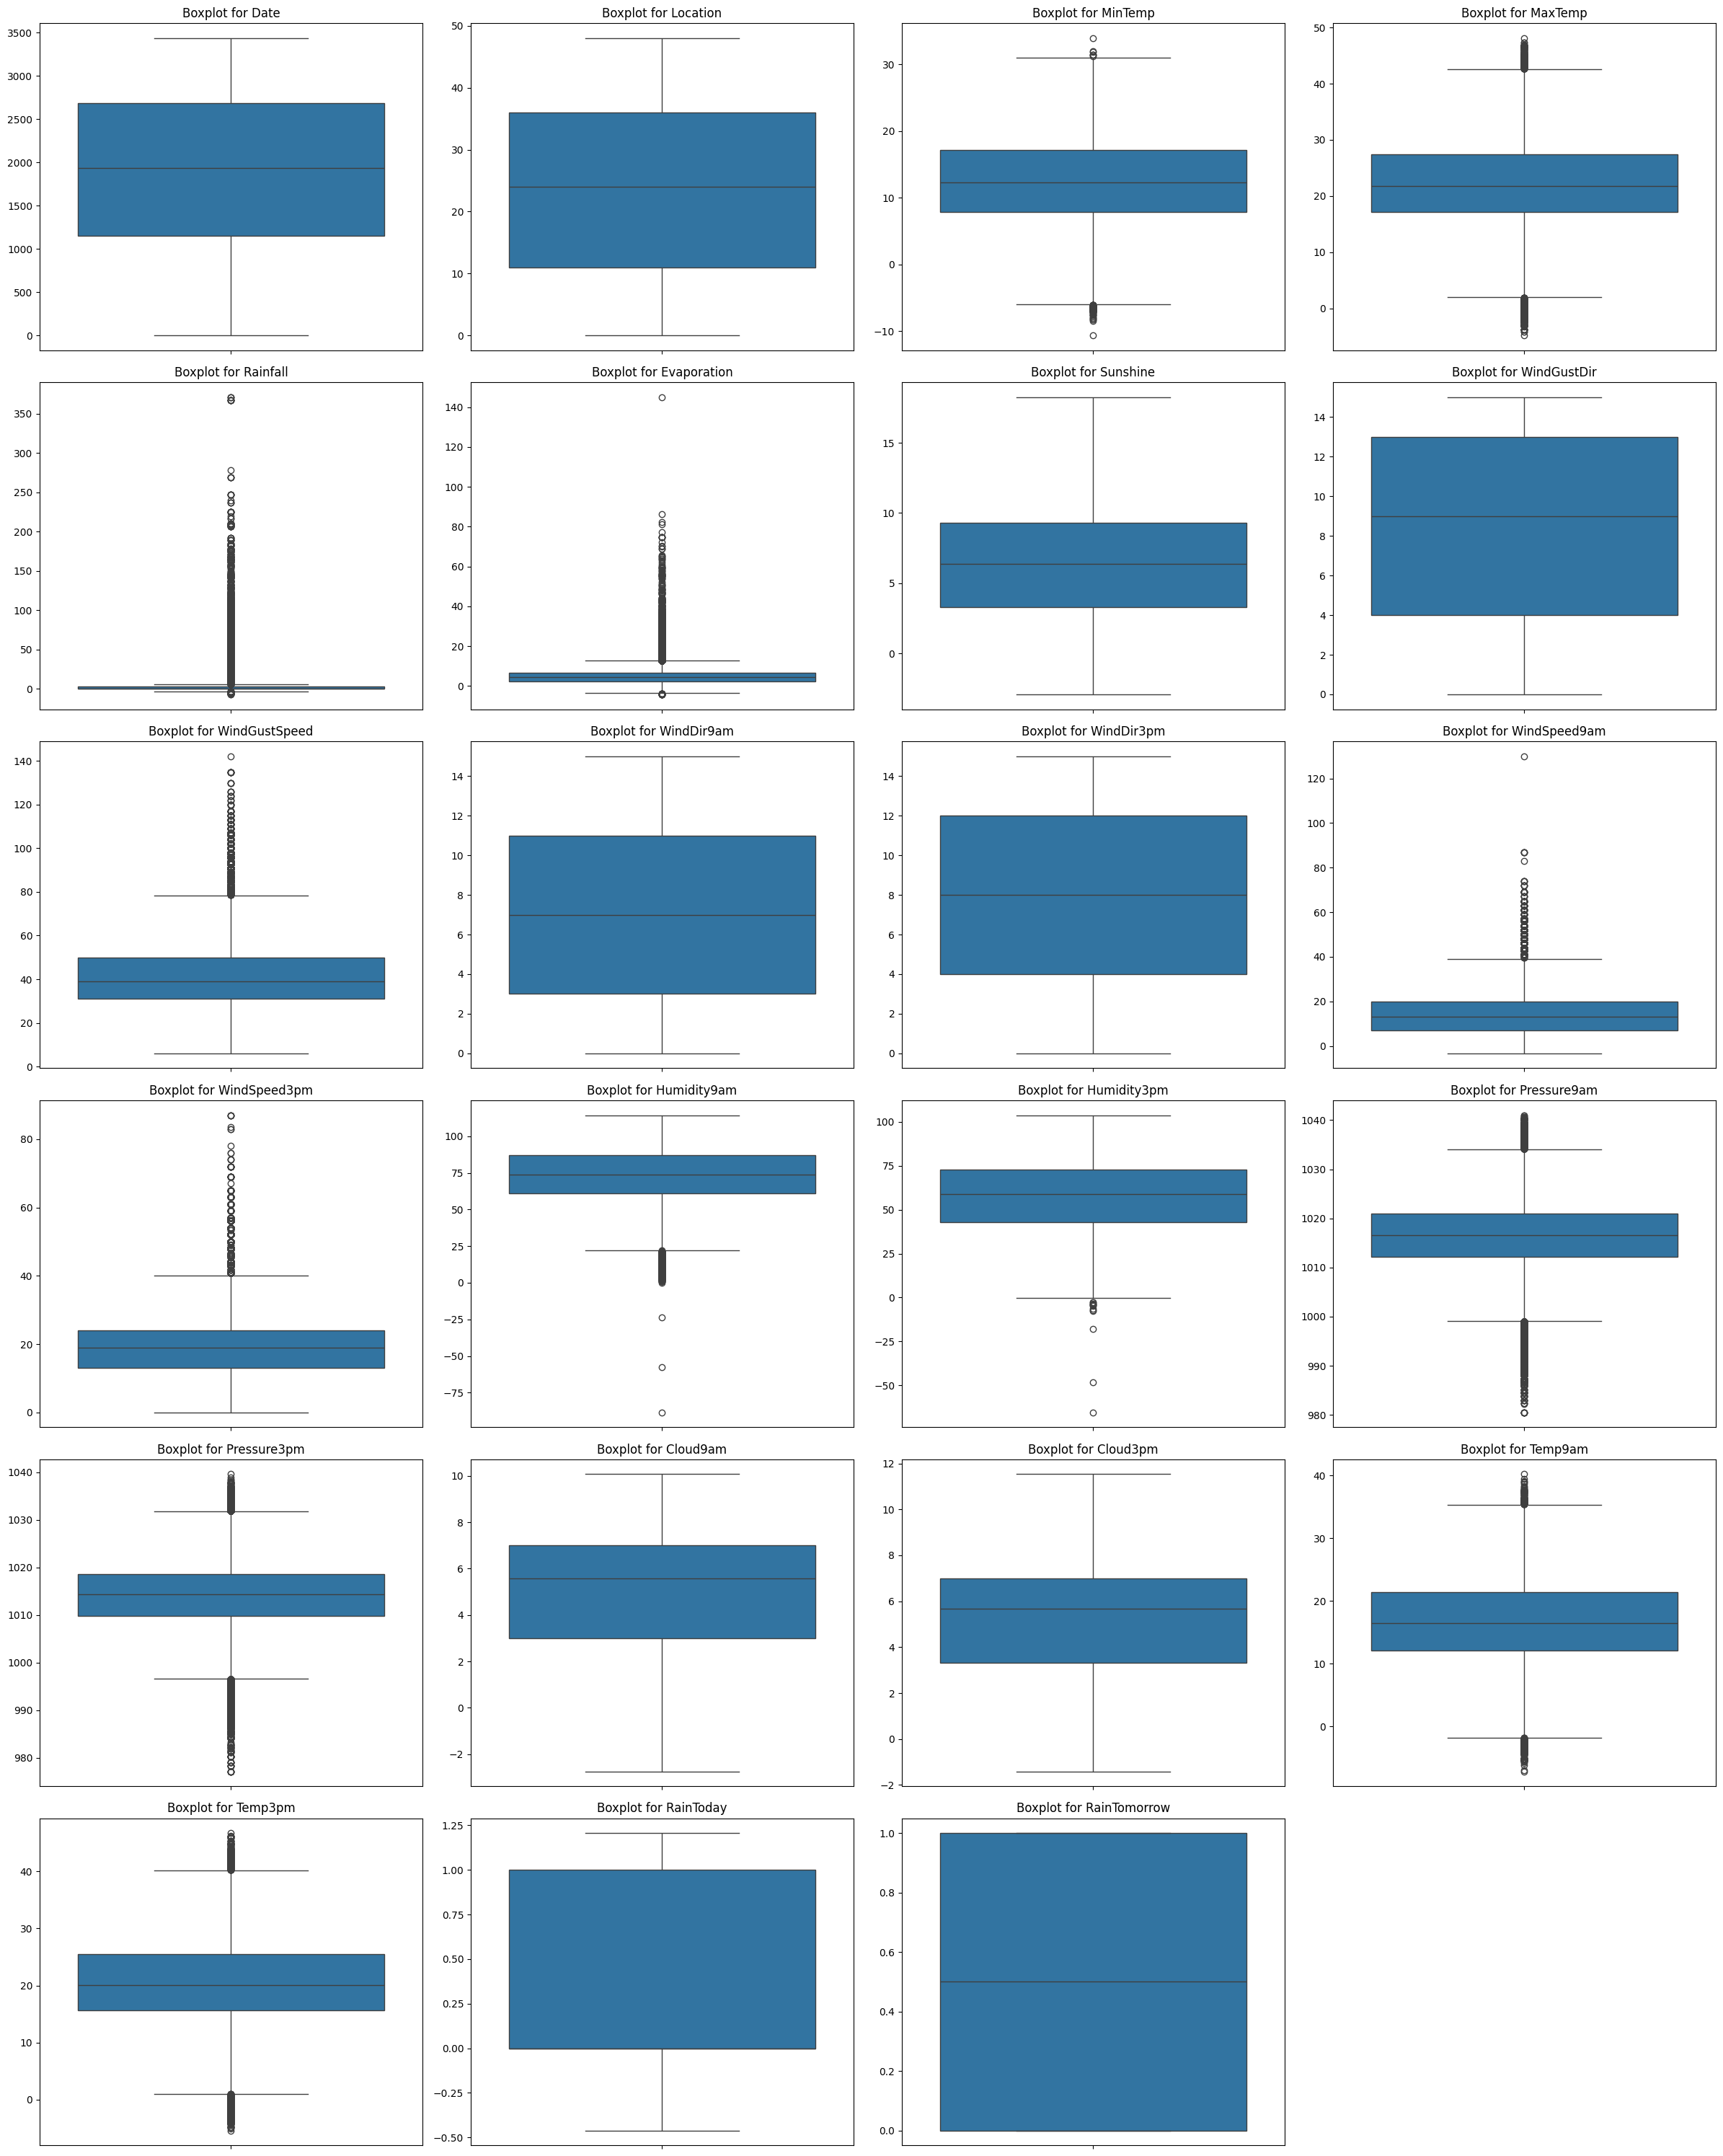

In [39]:
# showing outliers with boxplot
import math
def plot_boxplots(df, cols_per_row=2):
    numeric_cols = df.select_dtypes(include=['number']).columns  
    num_cols = len(numeric_cols)  
    rows = math.ceil(num_cols / cols_per_row)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(6*cols_per_row, 5*rows))
    axes = axes.flatten()  

    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f"Boxplot for {col}")
        axes[i].set_ylabel("")
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(df, cols_per_row=4)

In [40]:
# replacing outliers with capping method
def cap_outliers_iqr(df):
    for col in df.select_dtypes(include=['number']).columns: 
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1              
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with the bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

df = cap_outliers_iqr(df)

## Multicollinearity 

### Multicollinearity occurs when two or more variables  are highly correlated with each other. To detect it, I firstly create a heatmap that shows the correlation of variables between each other. Then I try to find the variable pairs that are highly correlated and for threshold I chose 0.8 .So, if the variables have correlation >0.8, I considered them as highly correlated variables. We get 7 pairs of variables like that. Then we should drop one of these variables in each pair. You can randomly choose the variable to drop. But dropping the variable that has less predictive power is better approach in terms of model prediction. For each highly correlated pair, I built a simple logistic regression model to find the univariate roc-auc score of each variable. I run the model for each variable and below you can see the univariate AUC scores. And I dropped the variable which has less score than the other.

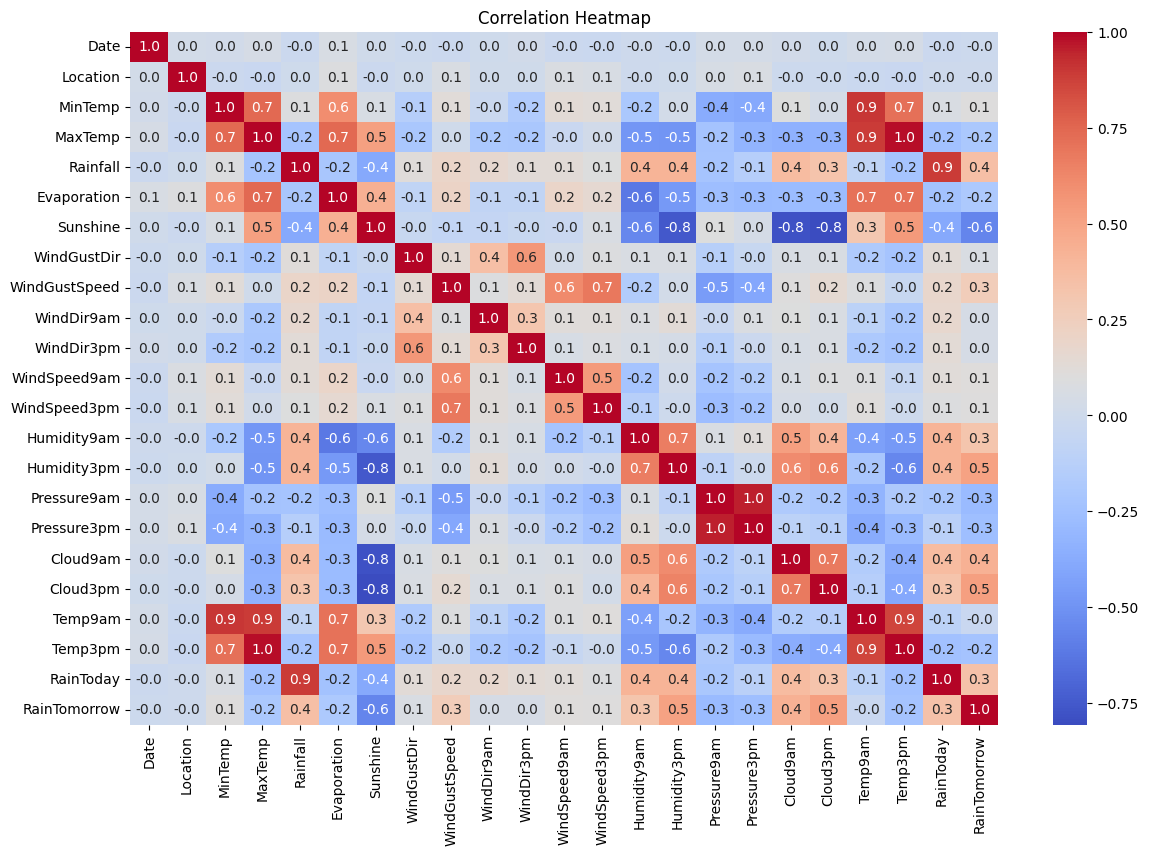

In [41]:
# Correlation Heatmap
def plot_correlation_heatmap(df):
    # Compute the correlation matrix
    corr_matrix = df.corr()
    
    # Create a heatmap
    plt.figure(figsize=(14, 9))
    sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

In [42]:
def find_high_corr_pairs(df, threshold=0.8):
    corr_matrix = df.corr()
    
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    for pair in pairs:
        print(f"{pair[0]} and {pair[1]} :  {pair[2]:.2f}")

find_high_corr_pairs(df, threshold=0.8)

Pressure3pm and Pressure9am :  0.96
Cloud3pm and Sunshine :  -0.81
Temp9am and MinTemp :  0.91
Temp9am and MaxTemp :  0.89
Temp3pm and MaxTemp :  0.98
Temp3pm and Temp9am :  0.86
RainToday and Rainfall :  0.89


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

X = df[['Rainfall']]  
y = df['RainTomorrow']     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

auc = roc_auc_score(y_test, y_prob)

print(f"AUC: {auc:.3f}")

AUC: 0.698


In [44]:
# univariate AUC scores for variables that have multicollinearity
# Temp3pm - 0.635
# Temp9am - 0.519
# MaxTemp - 0.610
# Cloud3pm - 0.807
# Sunshine - 0.827
# Pressure3pm - 0.651
# Pressure9am - 0.667
# RainToday - 0.660
# Rainfall - 0.698

In [45]:
# drop the column which has lower score in each pair
df.drop(columns=["Temp9am","Pressure3pm","Cloud3pm","MaxTemp","RainToday"],inplace=True)

In [46]:
df.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Temp3pm,RainTomorrow
0,396,2,13.4,0.6,5.734653,7.446035,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,8.000000,21.8,0
1,397,2,7.4,0.0,5.639329,11.520531,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1.731945,24.3,0
2,398,2,12.9,0.0,7.762688,12.348852,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1.827673,23.2,0
3,399,2,9.2,0.0,5.977293,11.811634,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1.233996,26.5,0
4,400,2,17.5,1.0,6.852837,5.728406,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,7.000000,29.7,0


## Scaling

### For scaling, I did min-max scaling. Min-max scaling (also called Normalization) is a technique used to scale the features of a dataset so that they fall within a specific range - between 0 and 1. 

In [47]:
# MinMax scaling
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
scaled_data = pd.DataFrame(r_scaler.transform(df), index=df.index, columns=df.columns)
scaled_data.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Temp3pm,RainTomorrow
0,0.115284,0.041667,0.522849,0.437500,0.577343,0.489673,0.866667,0.524138,0.866667,0.933333,0.544754,0.592593,0.530757,0.226726,0.247159,0.838410,0.530612,0.0
1,0.115575,0.041667,0.361559,0.375000,0.571559,0.682170,0.933333,0.524138,0.400000,1.000000,0.171218,0.543210,0.238299,0.255067,0.329545,0.349277,0.594388,0.0
2,0.115866,0.041667,0.509409,0.375000,0.700402,0.721304,1.000000,0.551724,0.866667,1.000000,0.521408,0.641975,0.173308,0.302302,0.244318,0.356747,0.566327,0.0
3,0.116157,0.041667,0.409946,0.375000,0.592066,0.695923,0.266667,0.248276,0.600000,0.000000,0.334640,0.222222,0.249131,0.170045,0.528409,0.310419,0.650510,0.0
4,0.116448,0.041667,0.633065,0.479167,0.645194,0.408525,0.866667,0.482759,0.066667,0.466667,0.241256,0.493827,0.649906,0.330642,0.335227,0.760374,0.732143,0.0


In [48]:
df=scaled_data

## Feature selection

### Feature selection is an essential part that should be done before modeling. It is not advised to build a model with many features as it will consume more time and energy and also it can potentially lead to overfitting. The main goal in modeling is to capture the overall pattern, not its details. For that purpose, we should only choose the most important features. Here I've use the Chi-square feature selection technique. This technique helps to identify which features are most relevant to the target variable by measuring the association between the feature and the target.

In [49]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Temp3pm'],
      dtype='object')


In [50]:
df=df[['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Temp3pm','RainTomorrow']]

In [51]:
df.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Temp3pm,RainTomorrow
0,0.437500,0.577343,0.489673,0.524138,0.544754,0.530757,0.226726,0.247159,0.838410,0.530612,0.0
1,0.375000,0.571559,0.682170,0.524138,0.171218,0.238299,0.255067,0.329545,0.349277,0.594388,0.0
2,0.375000,0.700402,0.721304,0.551724,0.521408,0.173308,0.302302,0.244318,0.356747,0.566327,0.0
3,0.375000,0.592066,0.695923,0.248276,0.334640,0.249131,0.170045,0.528409,0.310419,0.650510,0.0
4,0.479167,0.645194,0.408525,0.482759,0.241256,0.649906,0.330642,0.335227,0.760374,0.732143,0.0


## Modeling

### Finally, we can build the models. I have used Logistic Regression, Decision Tree, Random Forest, XGBoost, CatBoost ,and Multilayer Perceptron algorithms for modeling. For each model I've printed accuracy, precision, recall, f1 score, roc auc score, log loss value, model execution time. I have also built the confusion matrix and plotted ROC curve for each model.

## Logistic Regression

### Logistic Regression is a model used for binary classification problems, where the output is a probability that is mapped to a class using a logistic function.


--- Model Evaluation Metrics ---
Accuracy: 0.8021
Precision: 0.8081
Recall: 0.7949
F1 Score: 0.8014
ROC AUC Score: 0.8847
Log Loss: 0.4276
Model Execution Time: 0.2165 seconds



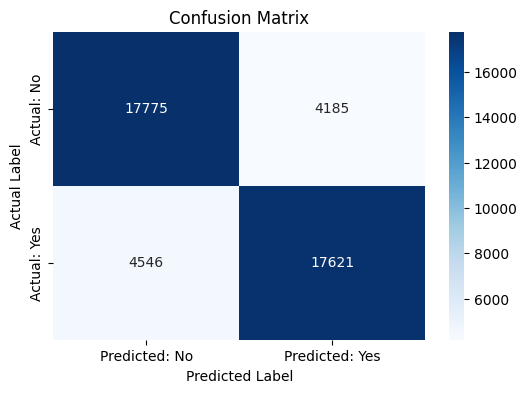

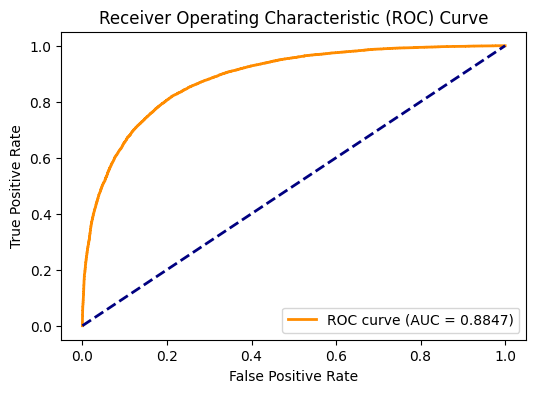

In [52]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, log_loss, precision_score, recall_score, f1_score, roc_curve, auc


X = df.drop('RainTomorrow', axis=1)  
y = df['RainTomorrow'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

start_time = time.time()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

end_time = time.time()

execution_time_log = end_time - start_time

accuracy_log = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc_log = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_log:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Model Execution Time: {execution_time_log:.4f} seconds\n")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree

### A Decision Tree is a non-linear model that splits the data into subsets based on feature values, using a tree-like structure.


--- Model Evaluation Metrics ---
Accuracy: 0.8698
Precision: 0.8463
Recall: 0.9052
F1 Score: 0.8747
ROC AUC Score: 0.9194
Log Loss: 1.3005

Model Execution Time: 0.3596 seconds



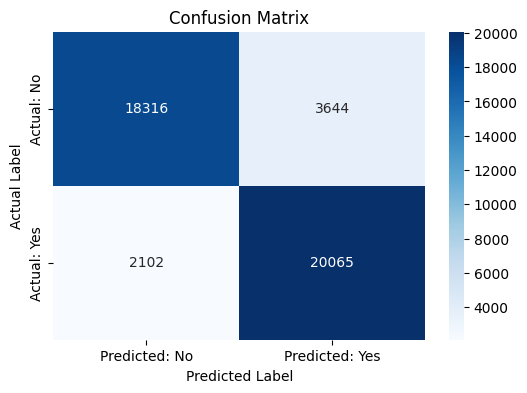

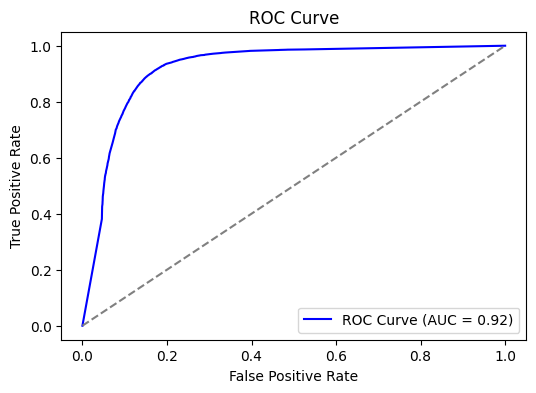

In [54]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params_dt = {'max_depth': 16, 'max_features': 'sqrt'}

dt_model = DecisionTreeClassifier(**params_dt)
start_time = time.time()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

end_time = time.time()
execution_time_tree = end_time - start_time

accuracy_tree = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_tree = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_tree:.4f}")
print(f"Log Loss: {log_loss_value:.4f}\n")
print(f"Model Execution Time: {execution_time_tree:.4f} seconds\n")
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

### Random Forest is an ensemble learning technique that constructs multiple decision trees during training and merges their results to improve accuracy and prevent overfitting. It works by randomly selecting subsets of features and samples, making it more robust than a single decision tree.


--- Model Evaluation Metrics ---
Accuracy: 0.9532
Precision: 0.9304
Recall: 0.9802
F1 Score: 0.9547
ROC AUC Score: 0.9925
Log Loss: 0.1629

Model Execution Time: 21.4902 seconds



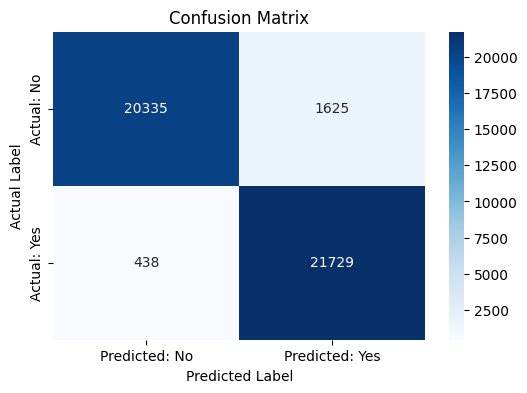

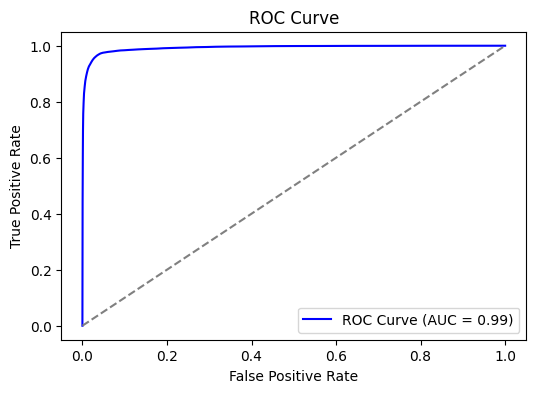

In [55]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('RainTomorrow', axis=1)  
y = df['RainTomorrow']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  

end_time = time.time()
execution_time_for = end_time - start_time

accuracy_for = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_for = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

# Print evaluation metrics
print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_for:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_for:.4f}")
print(f"Log Loss: {log_loss_value:.4f}\n")
print(f"Model Execution Time: {execution_time_for:.4f} seconds\n")
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_for))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## XGBOOST

### XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosting, where weak models (decision trees) are added sequentially to correct errors made by previous models.


--- Model Evaluation Metrics ---
Accuracy: 0.8406
Precision: 0.8422
Recall: 0.8402
F1 Score: 0.8412
ROC AUC Score: 0.9218
Log Loss: 0.3572

Model Execution Time: 0.3458 seconds



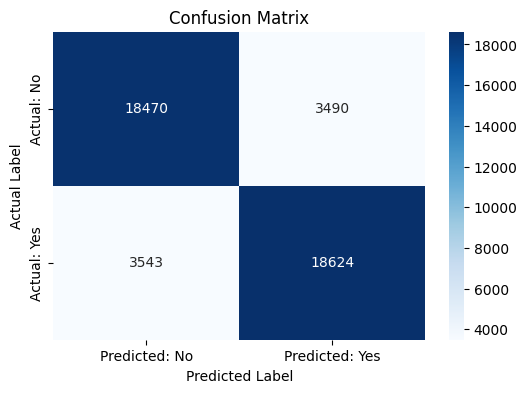

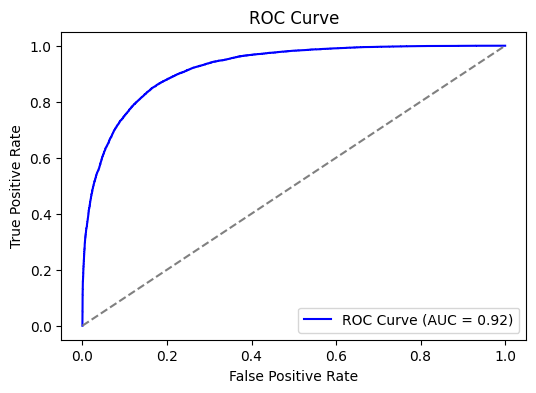

In [56]:
import xgboost as xgb

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)
start_time = time.time()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1] 

end_time = time.time()
execution_time_xg = end_time - start_time

accuracy_xg = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_xg = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_xg:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_xg:.4f}")
print(f"Log Loss: {log_loss_value:.4f}\n")
print(f"Model Execution Time: {execution_time_xg:.4f} seconds\n")
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_xg))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## CatBoost

### CatBoost is a gradient boosting algorithm specifically designed to handle categorical features directly without the need for extensive preprocessing. It efficiently reduces overfitting and performs well in classification tasks involving categorical data.


--- Model Evaluation Metrics ---
Accuracy: 0.8986
Precision: 0.8822
Recall: 0.9212
F1 Score: 0.9013
ROC AUC Score: 0.9576
Log Loss: 0.2693

Model Execution Time: 130.4599 seconds



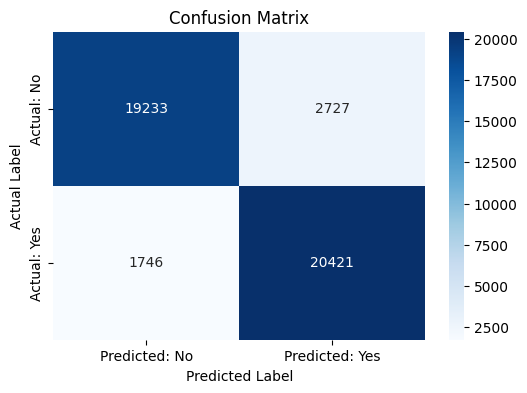

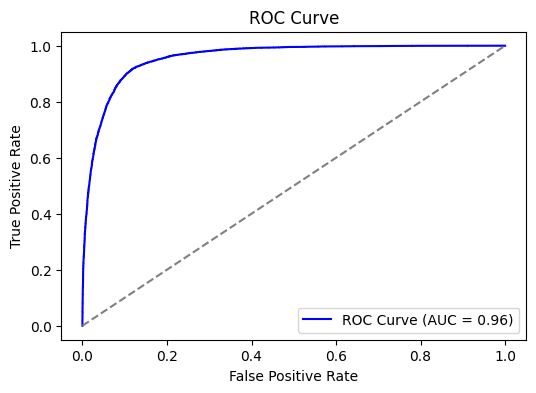

In [57]:
import catboost as cb

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params_cb = {'iterations': 50, 'max_depth': 16}

cb_model = cb.CatBoostClassifier(**params_cb, verbose=0)
start_time = time.time()
cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)
y_prob = cb_model.predict_proba(X_test)[:, 1]

end_time = time.time()
execution_time_cat = end_time - start_time

accuracy_cat = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_cat = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_cat:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_cat:.4f}")
print(f"Log Loss: {log_loss_value:.4f}\n")
print(f"Model Execution Time: {execution_time_cat:.4f} seconds\n")
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_cat))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Neural Network : Multilayer Perceptron

### A Multilayer Perceptron (MLP) is a type of artificial neural network with multiple layers of neurons, where each neuron in one layer is connected to all neurons in the next layer. It is highly flexible, capable of learning complex relationships between features.


--- Model Evaluation Metrics ---
Accuracy: 0.8259
Precision: 0.8238
Recall: 0.8313
F1 Score: 0.8275
ROC AUC Score: 0.9063
Log Loss: 0.3875

Model Execution Time: 336.3457 seconds



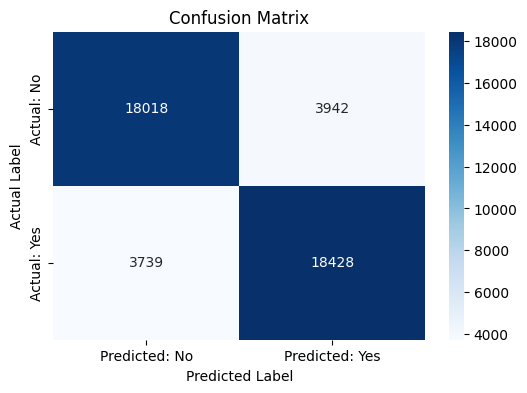

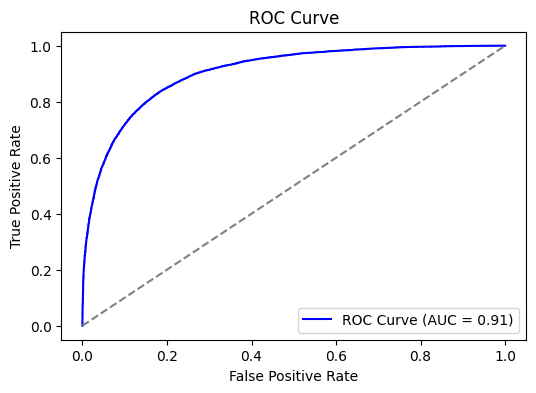

In [58]:
from sklearn.neural_network import MLPClassifier

X = df.drop('RainTomorrow', axis=1)  
y = df['RainTomorrow']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

mlp_model = MLPClassifier(**params_nn)
start_time = time.time()
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
y_prob = mlp_model.predict_proba(X_test)[:, 1] 

end_time = time.time()
execution_time_per = end_time - start_time

accuracy_per = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_per = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy_per:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc_per:.4f}")
print(f"Log Loss: {log_loss_value:.4f}\n")
print(f"Model Execution Time: {execution_time_per:.4f} seconds\n")
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_per))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Models Comparison

### Here I try to compare the models that I've built. I chose to compare their accuracy, roc-auc score, and execution time. We can see that Random Forest is in the first place in terms of accuracy and roc. For execution time, Logistic regression has taken the least, and Multilayer perceptron has taken the most time (cause it's neural network algorithm).

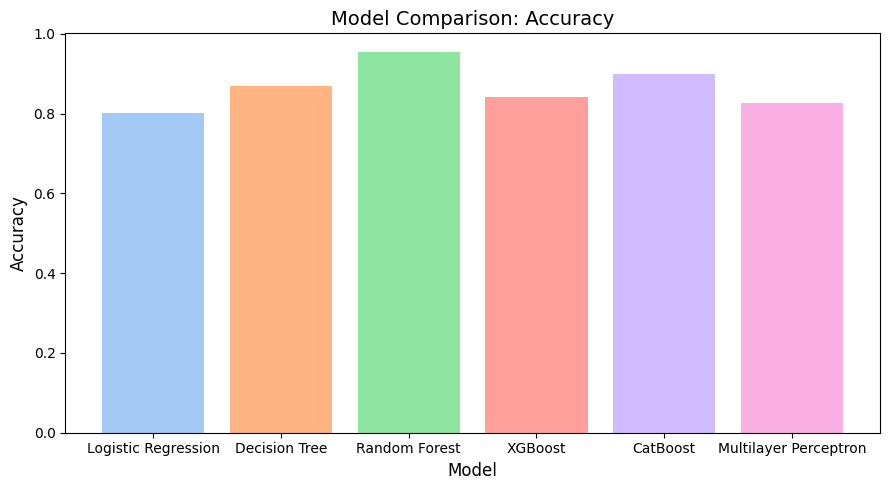

In [71]:
values = [accuracy_log, accuracy_tree, accuracy_for, accuracy_xg, accuracy_cat,accuracy_per]  

custom_variable_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost','Multilayer Perceptron']  # New names for x-axis
x_labels = custom_variable_names  

plt.figure(figsize=(9, 5))
bars = plt.bar(x_labels, values, color=['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#fab0e4'])

plt.title('Model Comparison: Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.tight_layout()
plt.show()

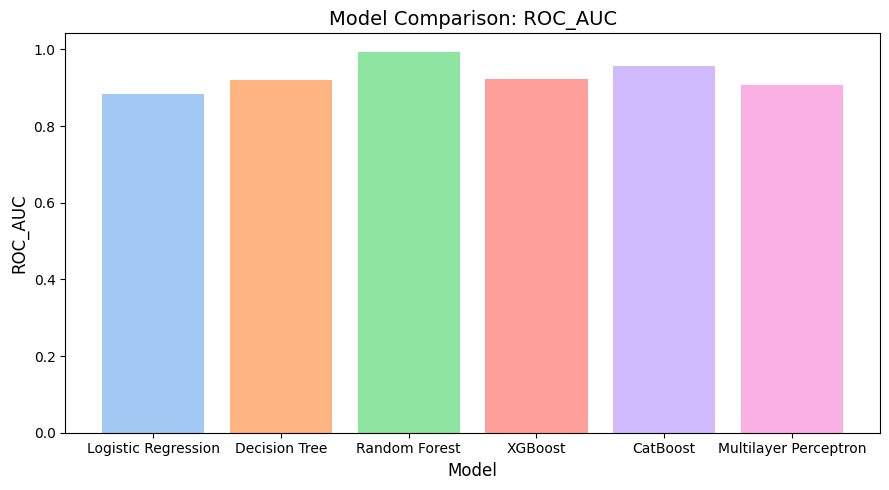

In [72]:
values = [roc_auc_log, roc_auc_tree,roc_auc_for, roc_auc_xg,roc_auc_cat,roc_auc_per]  

custom_variable_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost','Multilayer Perceptron']  # New names for x-axis
x_labels = custom_variable_names  

plt.figure(figsize=(9, 5))
bars = plt.bar(x_labels, values, color=['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#fab0e4'])

plt.title('Model Comparison: ROC_AUC', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('ROC_AUC', fontsize=12)

plt.tight_layout()
plt.show()

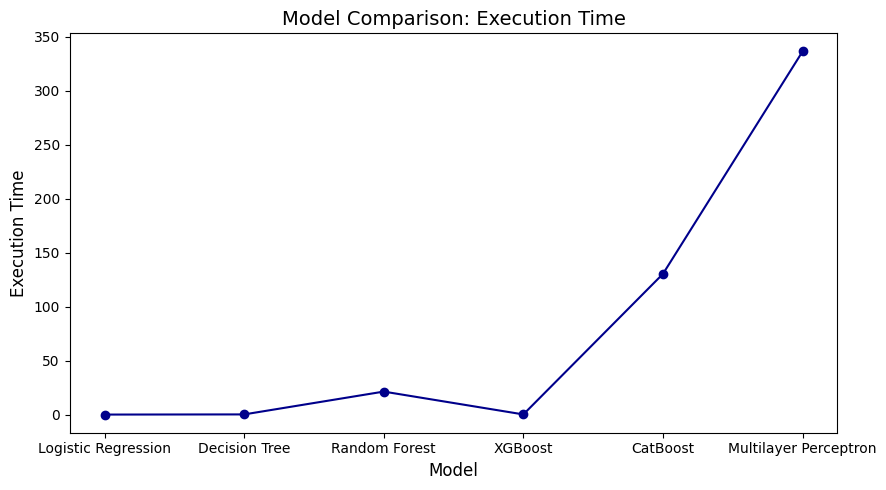

In [75]:
values = [execution_time_log, execution_time_tree,execution_time_for, execution_time_xg,execution_time_cat,execution_time_per]  

custom_variable_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost','Multilayer Perceptron']  # New names for x-axis
x_labels = custom_variable_names  

plt.figure(figsize=(9, 5))
plt.plot(x_labels, values, marker='o', linestyle='-', color='#00008B')

plt.title('Model Comparison: Execution Time', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Execution Time', fontsize=12)

plt.tight_layout()
plt.show()